In [14]:
# pip install ipython
# pip install pillow
# pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from PIL import Image as Image2

import tushare as ts
import datetime
from datetime import datetime as dtime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num
import talib

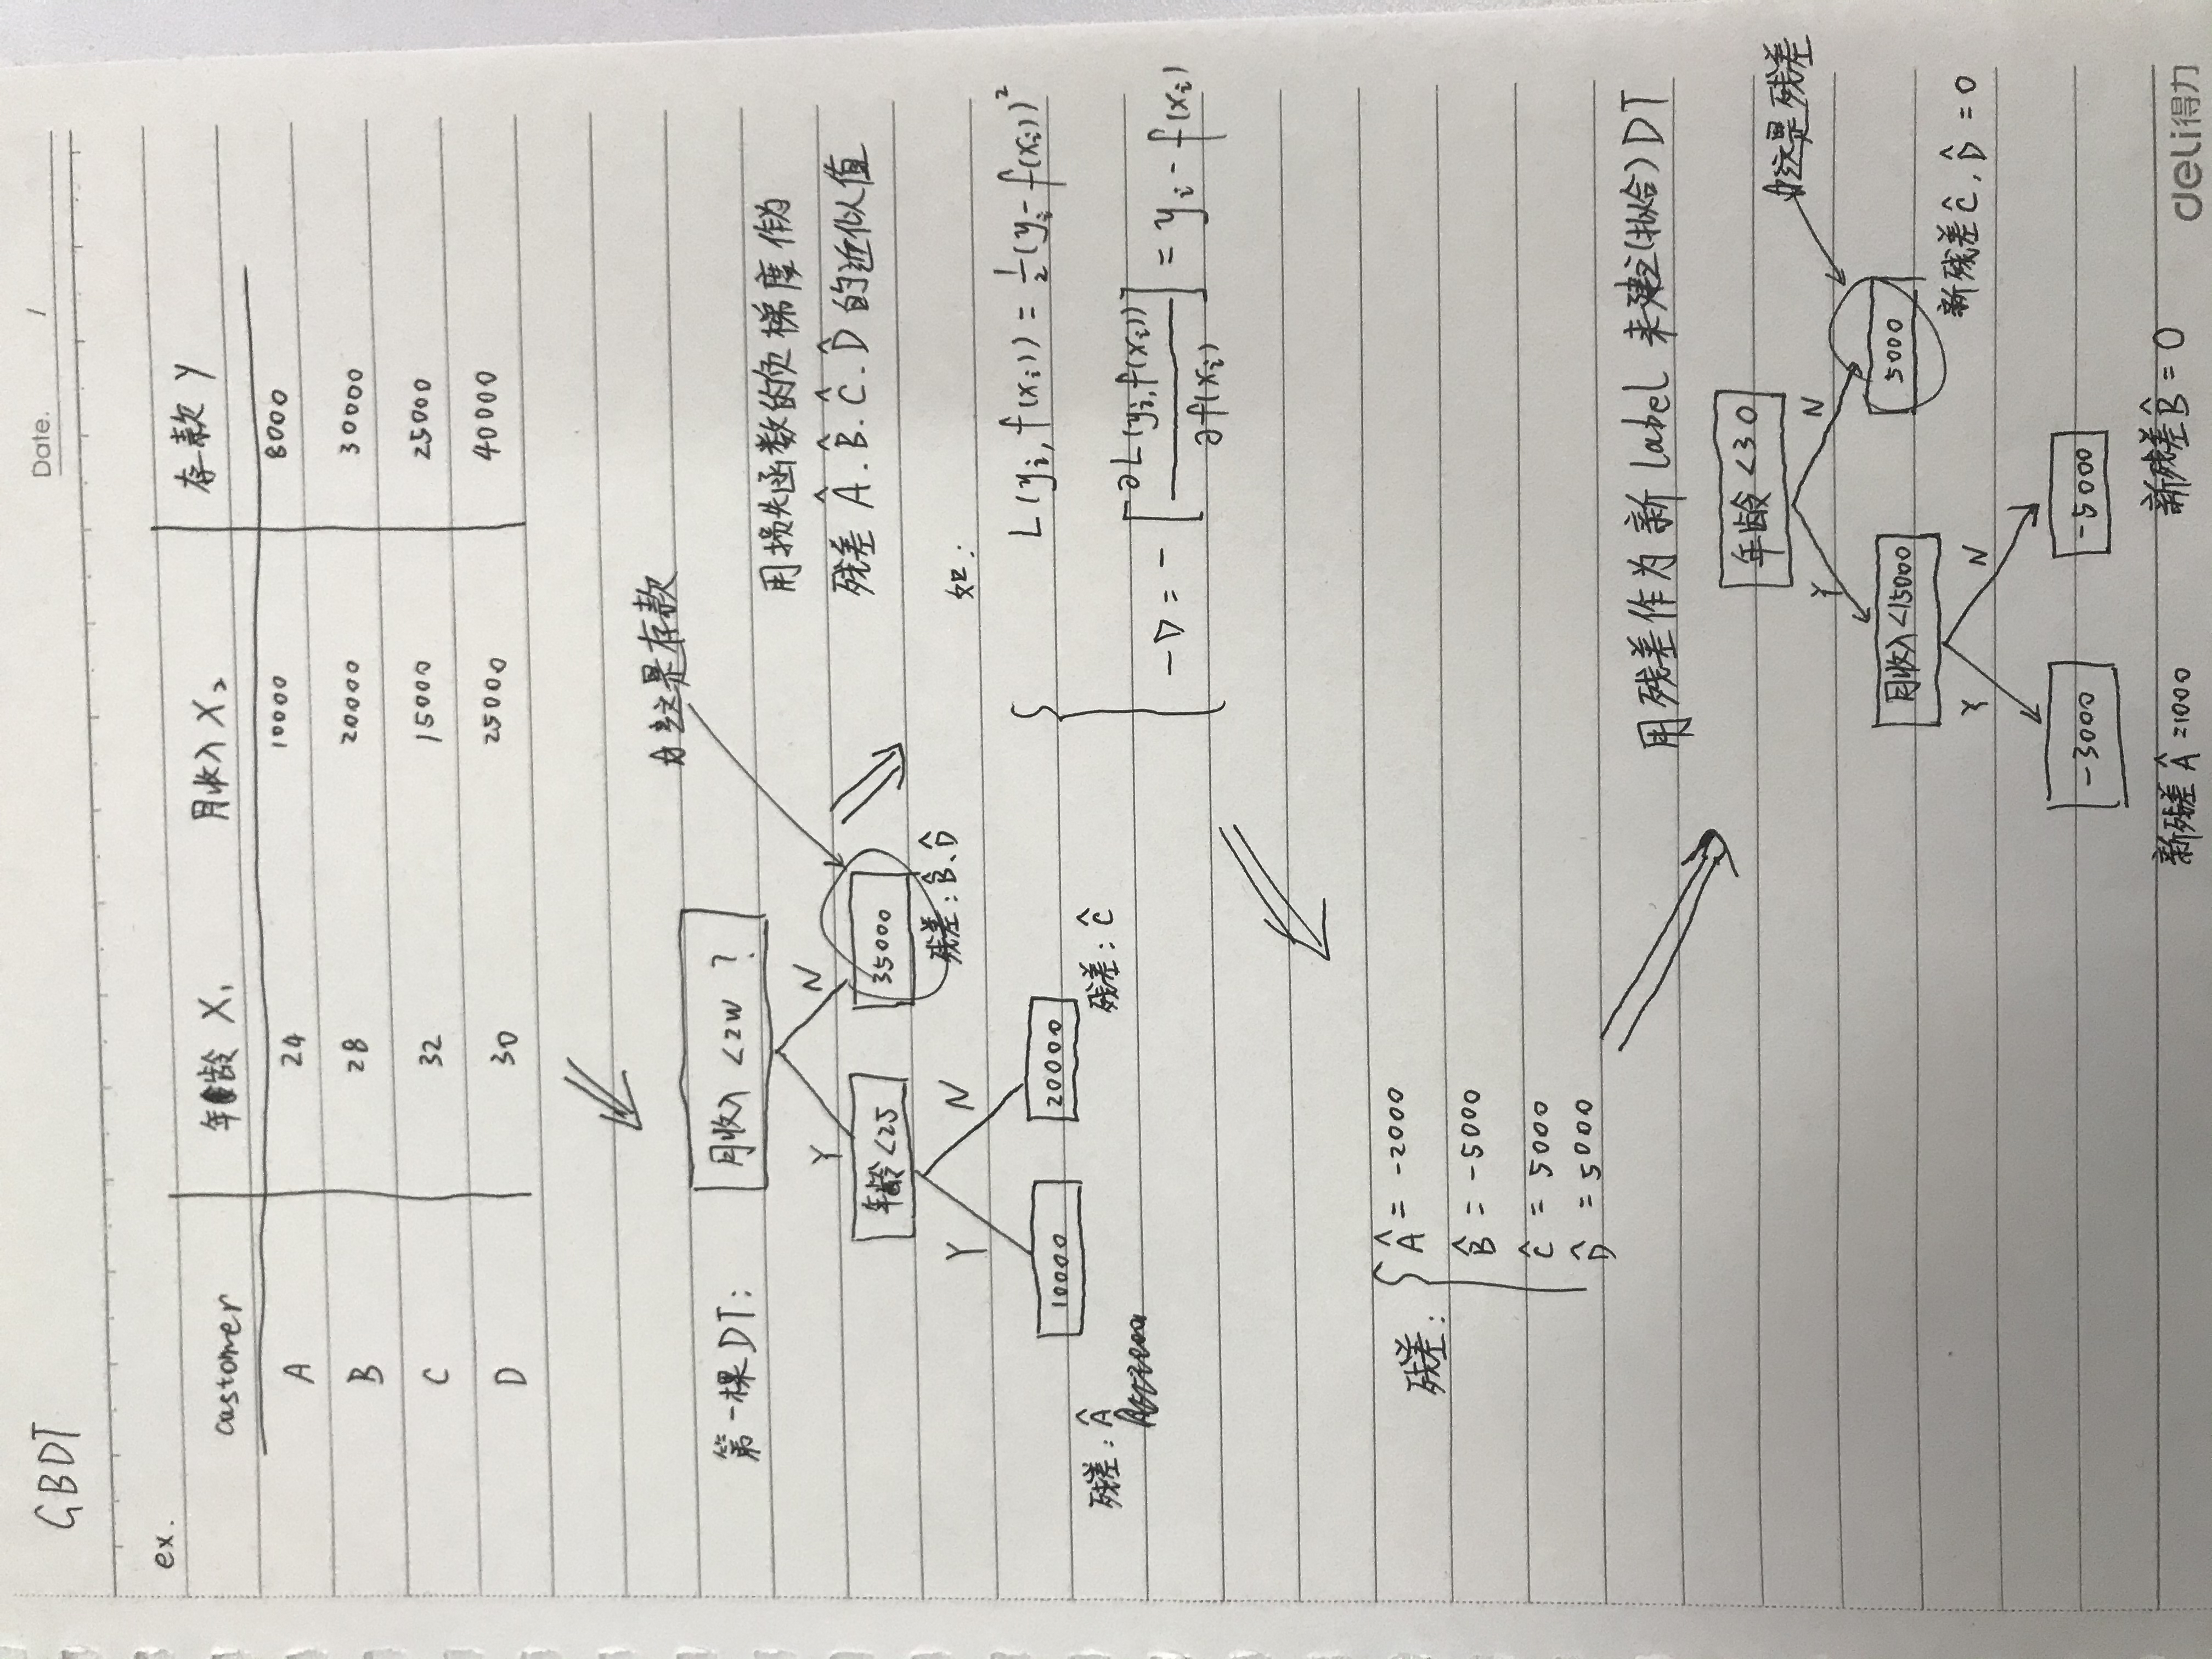

In [3]:
'''
AdaBoost根据分类效果调整样本与弱分类器的权重并不断迭代，最终生成强学习器;

GBDT则将损失函数的负梯度作为残差的近似值,
不断使用残差迭代和拟合回归树，最终生成强学习器.

What is Gradient Boosting Decision Tree Algorithm in two graphs?
'''

Image(filename = "gbdt.jpg", width = 700, height = 700)

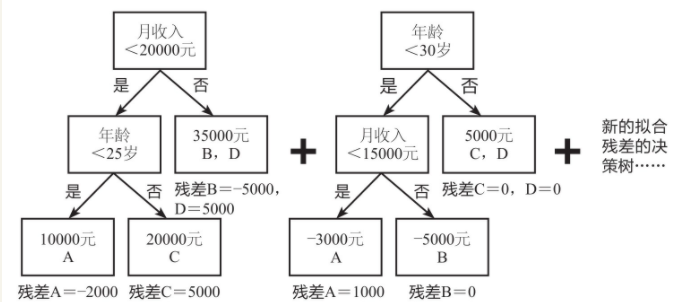

In [4]:
Image(filename = "gbdt2.png", width = 700, height = 700)

In [6]:
'''
图书定价模型
'''

book_df = pd.read_excel('产品定价模型.xlsx')
book_df.head()

页数   类别  彩印   纸张  价格
0  207  技术类   0  双胶纸  60
1  210  技术类   0  双胶纸  62
2  206  技术类   0  双胶纸  62
3  218  技术类   0  双胶纸  64
4  209  技术类   0  双胶纸  60

In [10]:
# 各分类数据样本量
book_df['类别'].value_counts()

技术类    336
教辅类    333
办公类    331
Name: 类别, dtype: int64

In [11]:
book_df['彩印'].value_counts()

0    648
1    352
Name: 彩印, dtype: int64

In [12]:
book_df['纸张'].value_counts()

双胶纸    615
铜版纸    196
书写纸    189
Name: 纸张, dtype: int64

In [15]:
le = LabelEncoder()
book_df['类别'] = le.fit_transform(book_df['类别'])  # 处理类别
book_df['类别'].value_counts()

1    336
2    333
0    331
Name: 类别, dtype: int64

In [16]:
book_df['纸张'] = le.fit_transform(book_df['纸张'])  # 处理类别
book_df.head()

页数  类别  彩印  纸张  价格
0  207   1   0   1  60
1  210   1   0   1  62
2  206   1   0   1  62
3  218   1   0   1  64
4  209   1   0   1  60

In [18]:
# split features and label
X = book_df.drop(columns='价格') 
y = book_df['价格']

# train_test_split
X_train, X_test, y_train, y_test\
= train_test_split(X, y, test_size=0.2, random_state=123)

# fit GBDT model
gbdt_model = GradientBoostingRegressor(random_state=123)
gbdt_model.fit(X_train, y_train)
price_predict = gbdt_model.predict(X_test)
vec = pd.DataFrame()
vec['预测值'] = list(price_predict)
vec['实际值'] = list(y_test)
vec.head()

预测值  实际值
0  71.150040   75
1  79.561999   84
2  68.217518   68
3  90.787885   90
4  78.884791   85

In [19]:
gbdt_model.score(X_test, y_test)

0.8741691363311168

In [21]:
# 通过DataFrame的方式展示特征重要性
features = X.columns  # 获取特征名称
importances = gbdt_model.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
impt_df = pd.DataFrame()
impt_df['feature'] = features
impt_df['feature_importance'] = importances
impt_df.sort_values('feature_importance', ascending=False)

feature  feature_importance
0      页数            0.490702
1      类别            0.447187
2      彩印            0.041615
3      纸张            0.020496

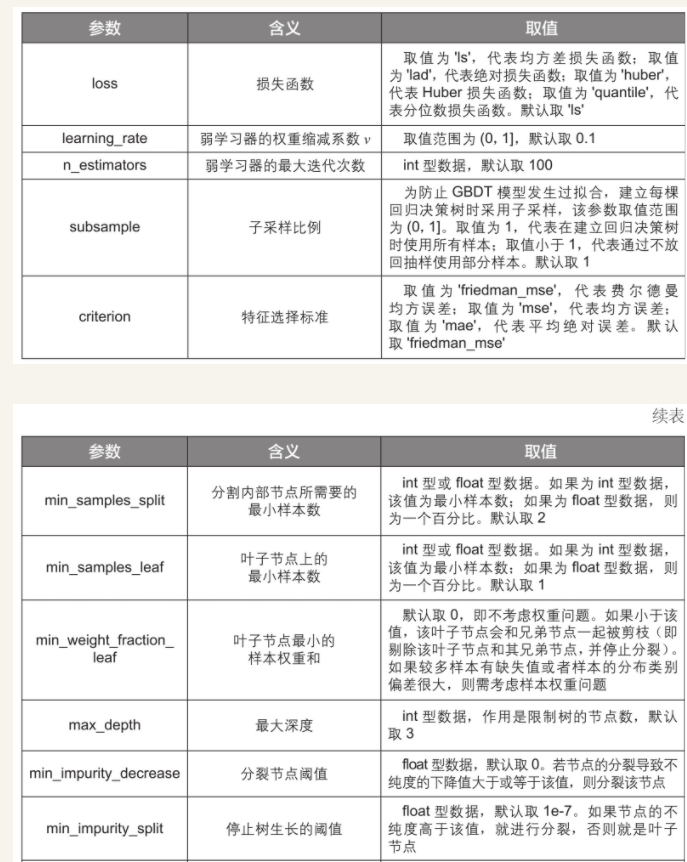

In [22]:
'''
hyperparameters of GBDT model
'''

Image(filename = "hyper.png", width = 700, height = 700)

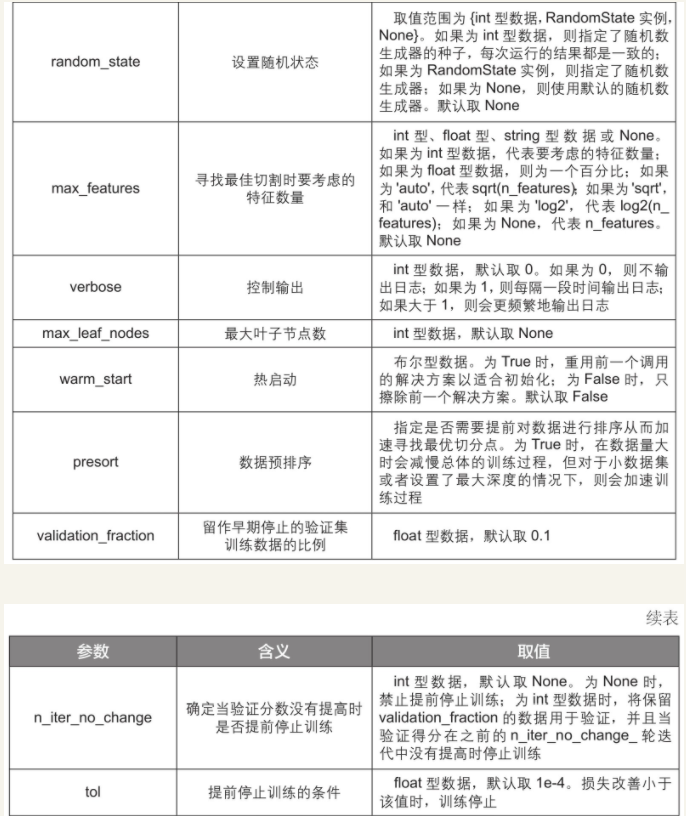

In [23]:
Image(filename = "hyper2.png", width = 700, height = 700)

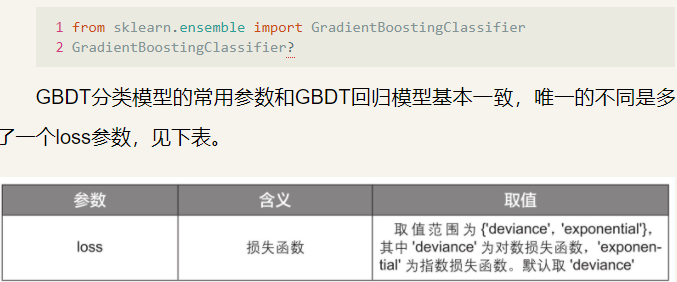

In [24]:
Image(filename = "hyper3.png", width = 700, height = 700)